<a href="https://colab.research.google.com/github/Richardesl10/Se-alesysistemasrichard/blob/main/Parcial_1_Sys_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

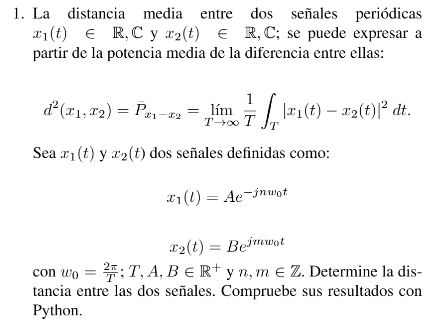

In [1]:
import sympy as sp

# Inicializamos impresión
sp.init_printing()

# Variables simbólicas
t, A, B, T = sp.symbols('t A B T', real=True, positive=True)
n, m = sp.symbols('n m', integer=True)
w0 = 2 * sp.pi / T

# Definimos las señales
x1 = A * sp.exp(-sp.I * n * w0 * t)
x2 = B * sp.exp(sp.I * m * w0 * t)

# Paso 1: Potencia x1(t)
Px1 = (1 / T) * sp.integrate(sp.Abs(x1)**2, (t, 0, T))
Px1_simplified = sp.simplify(Px1)

# Paso 2: Potencia de x2(t)
Px2 = (1 / T) * sp.integrate(sp.Abs(x2)**2, (t, 0, T))
Px2_simplified = sp.simplify(Px2)

# Paso 3: Producto cruzado x1 * conjugado(x2)
x2_conj = sp.conjugate(x2)
cross_term = (-2 / T) * sp.integrate(x1 * x2_conj, (t, 0, T))
cross_term_simplified = sp.simplify(cross_term)

# Paso 4: Distancia al cuadrado
d_squared = Px1_simplified + Px2_simplified + cross_term_simplified
d_squared_simplified = sp.simplify(d_squared)

# Paso 5: Definimos la distancia como expresión por tramos (sin raíz)
d_piecewise = sp.Piecewise(
    (sp.Abs(A - B), sp.Eq(n, -m)),
    (sp.sqrt(A**2 + B**2), True)
)

# para mostrar resultados
print("Potencia de x1(t):")
display(Px1_simplified)

print("Potencia de x2(t):")
display(Px2_simplified)

print("Término cruzado -2/T ∫ x1(t) * conj(x2(t)) dt:")
display(cross_term_simplified)

print("Distancia al cuadrado d²(x1, x2):")
display(d_squared_simplified)

print("Distancia d(x1, x2):")
display(d_piecewise)

Potencia de x1(t):


 2
A 

Potencia de x2(t):


 2
B 

Término cruzado -2/T ∫ x1(t) * conj(x2(t)) dt:


⎧  0     for m ≠ -n
⎨                  
⎩-2⋅A⋅B  otherwise 

Distancia al cuadrado d²(x1, x2):


⎧     2    2                
⎪    A  + B       for m ≠ -n
⎨                           
⎪ 2            2            
⎩A  - 2⋅A⋅B + B   otherwise 

Distancia d(x1, x2):


⎧  │A - B│     for m = -n
⎪                        
⎨   _________            
⎪  ╱  2    2             
⎩╲╱  A  + B    otherwise 

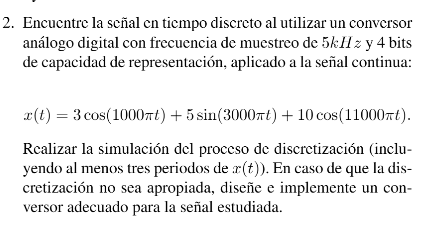

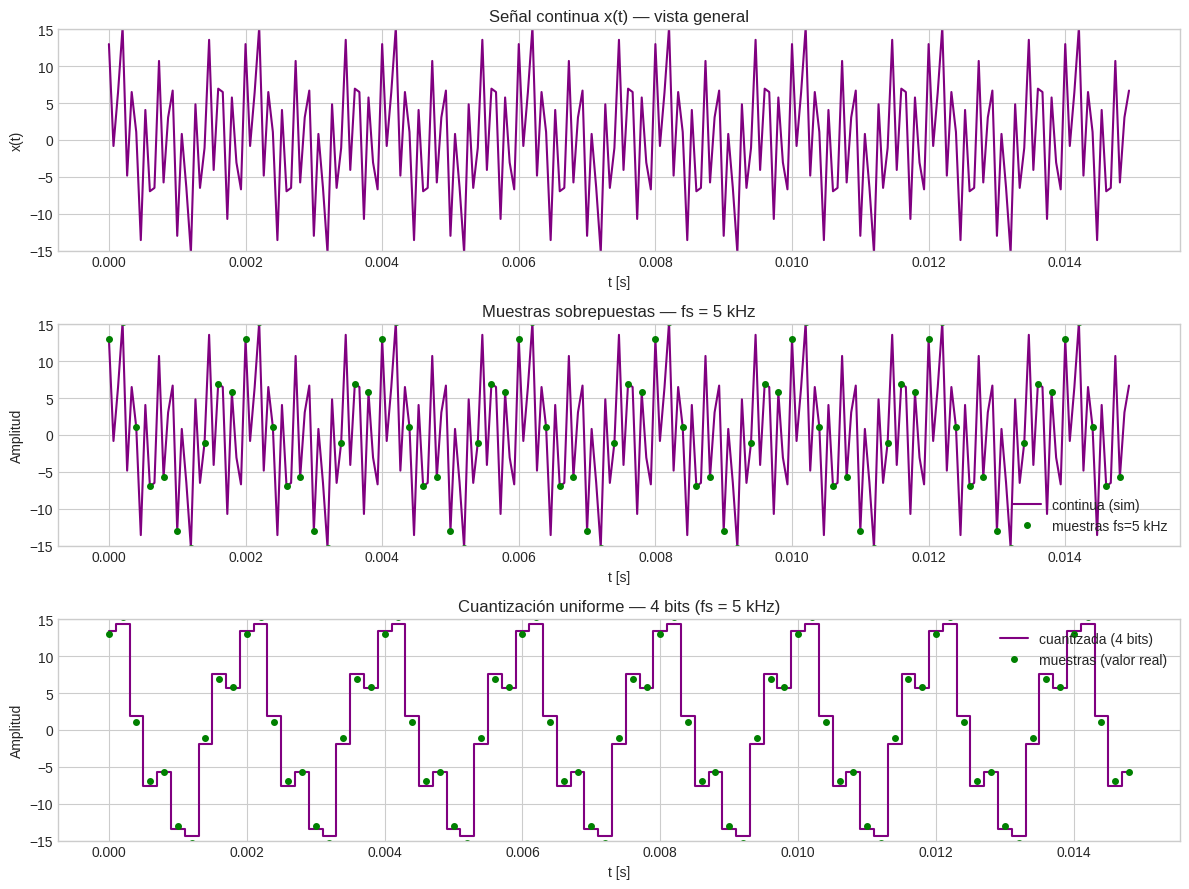

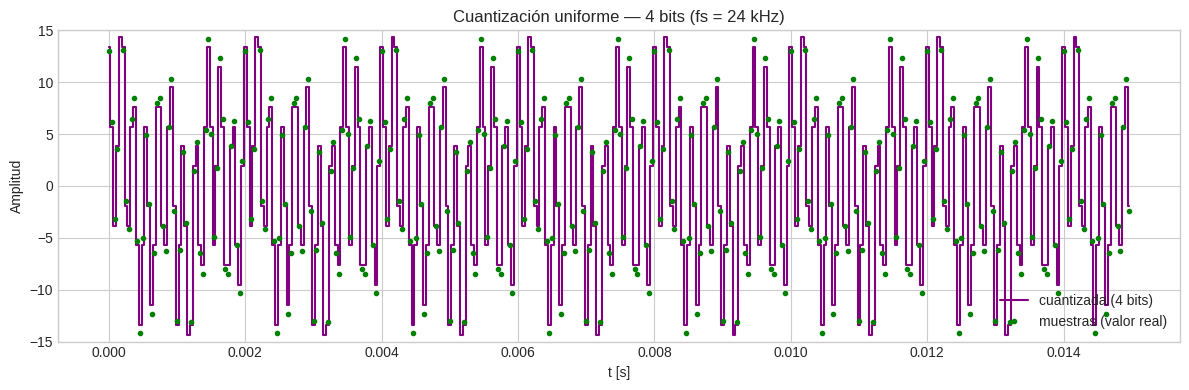

In [97]:
#    Muestreo y Cuantización de una Señal
# Este código genera una señal analógica simulada (continua),
# la muestrea con diferentes frecuencias, aplica cuantización uniforme
# y muestra las diferencias gráficamente.

import numpy as np
import matplotlib.pyplot as plt
# 1. Definición de la señal continua (simulada)
A1 = 3.0      # Amplitud señal 1
f1 = 500      # Frecuencia señal 1 (Hz)
A2 = 5.0      # Amplitud señal 2
f2 = 1500     # Frecuencia señal 2 (Hz)
A3 = 10.0     # Amplitud señal 3
f3 = 5500     # Frecuencia señal 3 (Hz)

f_cont = 15000     # Frecuencia de muestreo para simular continuo (Hz)
t_end = 0.015      # Duración de la señal (s)

# Vector de tiempo continuo
t = np.arange(0, t_end, 1/f_cont)

# Señal continua compuesta
x_cont = (A1*np.cos(2*np.pi*f1*t) +
          A2*np.sin(2*np.pi*f2*t) +
          A3*np.cos(2*np.pi*f3*t))
# 2. Muestreo con fs1 = 5 kHz y cuantización de 4 bits

fs1 = 5000   # Frecuencia de muestreo 1 (Hz)
bits1 = 4    # Resolución en bits
t_s1 = np.arange(0, t_end, 1/fs1)

# Señal muestreada (fs = 5 kHz)
x_s1 = (A1*np.cos(2*np.pi*f1*t_s1) +
        A2*np.sin(2*np.pi*f2*t_s1) +
        A3*np.cos(2*np.pi*f3*t_s1))

# Parámetros de cuantización
xmax = np.max(np.abs(x_cont))  # valor máximo absoluto
levels1 = 2**bits1             # número de niveles de cuantización
delta1 = 2*xmax/levels1        # paso de cuantización

# Cuantización uniforme
xq1 = np.round(x_s1 / delta1) * delta1
# Evita saturación fuera de rango
xq1 = np.clip(xq1, -xmax + delta1/2, xmax - delta1/2)

# 3. Muestreo con fs2 = 24 kHz y cuantización de 4 bits
fs2 = 24000
bits2 = 4
t_s2 = np.arange(0, t_end, 1/fs2)

# Señal muestreada (fs = 24 kHz)
x_s2 = (A1*np.cos(2*np.pi*f1*t_s2) +
        A2*np.sin(2*np.pi*f2*t_s2) +
        A3*np.cos(2*np.pi*f3*t_s2))

# Cuantización uniforme
levels2 = 2**bits2
delta2 = 2*xmax/levels2
xq2 = np.round(x_s2 / delta2) * delta2
xq2 = np.clip(xq2, -xmax + delta2/2, xmax - delta2/2)

# 4. Gráficas de resultados

# Figura con 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 9))
plt.subplots_adjust(hspace=0.5)

# (1) Señal continua
axs[0].plot(t, x_cont, color='purple')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('x(t)')
axs[0].set_title('Señal continua x(t) — vista general')
axs[0].set_ylim([-15, 15])    # <-- rango de amplitud fijo
axs[0].grid(True)

# (2) Señal muestreada (fs = 5 kHz)
axs[1].plot(t, x_cont, color='purple', label='continua (sim)')
axs[1].plot(t_s1, x_s1, 'o', color='green', markersize=4, label='muestras fs=5 kHz')
axs[1].set_xlabel('t [s]')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Muestras sobrepuestas — fs = 5 kHz')
axs[1].set_ylim([-15, 15])    # <-- rango fijo
axs[1].legend()
axs[1].grid(True)

# (3) Señal cuantizada (fs = 5 kHz, 4 bits)
axs[2].step(t_s1, xq1, where='mid', color='purple', label='cuantizada (4 bits)')
axs[2].plot(t_s1, x_s1, 'o', color='green', markersize=4, label='muestras (valor real)')
axs[2].set_xlabel('t [s]')
axs[2].set_ylabel('Amplitud')
axs[2].set_title('Cuantización uniforme — 4 bits (fs = 5 kHz)')
axs[2].set_ylim([-15, 15])    # <-- rango fijo
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# 5. Cuantización para fs = 24 kHz (gráfica separada)
plt.figure(figsize=(12, 4))
plt.step(t_s2, xq2, where='mid', color='purple', label='cuantizada (4 bits)')
plt.plot(t_s2, x_s2, 'o', color='green', markersize=3, label='muestras (valor real)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.title('Cuantización uniforme — 4 bits (fs = 24 kHz)')
plt.ylim([-15, 15])           # <-- rango fijo
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

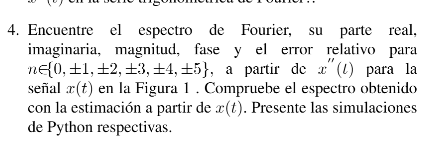

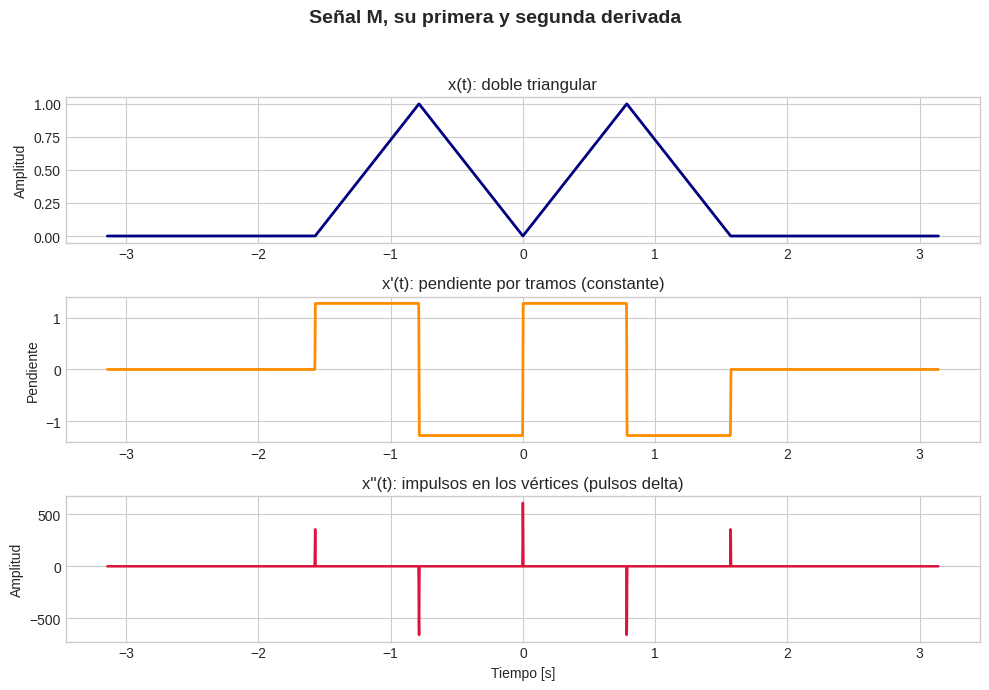

In [95]:
import numpy as np
import matplotlib.pyplot as plt
#en esta primera parte del codgio se muestra la grafica de la señal x(t) su primera derivada y la segunda, obteniendo como señal a trabjar un modelo de deltas de dirac.

# Parámetros
A = 1
T = 2 * np.pi
N = 4000
t = np.linspace(-T/2, T/2, N)
dt = t[1] - t[0]
d1 = T / 8
d2 = T / 4

# Señal M-shaped
x = np.zeros_like(t)
for i, ti in enumerate(t):
    if -d2 <= ti < -d1:
        x[i] = A * (ti + d2) / (d2 - d1)
    elif -d1 <= ti < 0:
        x[i] = -A * (ti + d1) / d1 + A
    elif 0 <= ti < d1:
        x[i] = A * ti / d1
    elif d1 <= ti < d2:
        x[i] = -A * (ti - d1) / (d2 - d1) + A

# Derivadas numéricas
x1 = np.gradient(x, dt)
x2 = np.gradient(x1, dt)

# Gráficas
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
fig.suptitle("Señal M, su primera y segunda derivada", fontsize=14, weight='bold')

axs[0].plot(t, x, color='navy', linewidth=2)
axs[0].set_title("x(t): doble triangular")
axs[0].set_ylabel("Amplitud")

axs[1].plot(t, x1, color='darkorange', linewidth=2)
axs[1].set_title("x'(t): pendiente por tramos (constante)")
axs[1].set_ylabel("Pendiente")

axs[2].plot(t, x2, color='crimson', linewidth=1.8)
axs[2].set_title("x''(t): impulsos en los vértices (pulsos delta)")
axs[2].set_xlabel("Tiempo [s]")
axs[2].set_ylabel("Amplitud")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


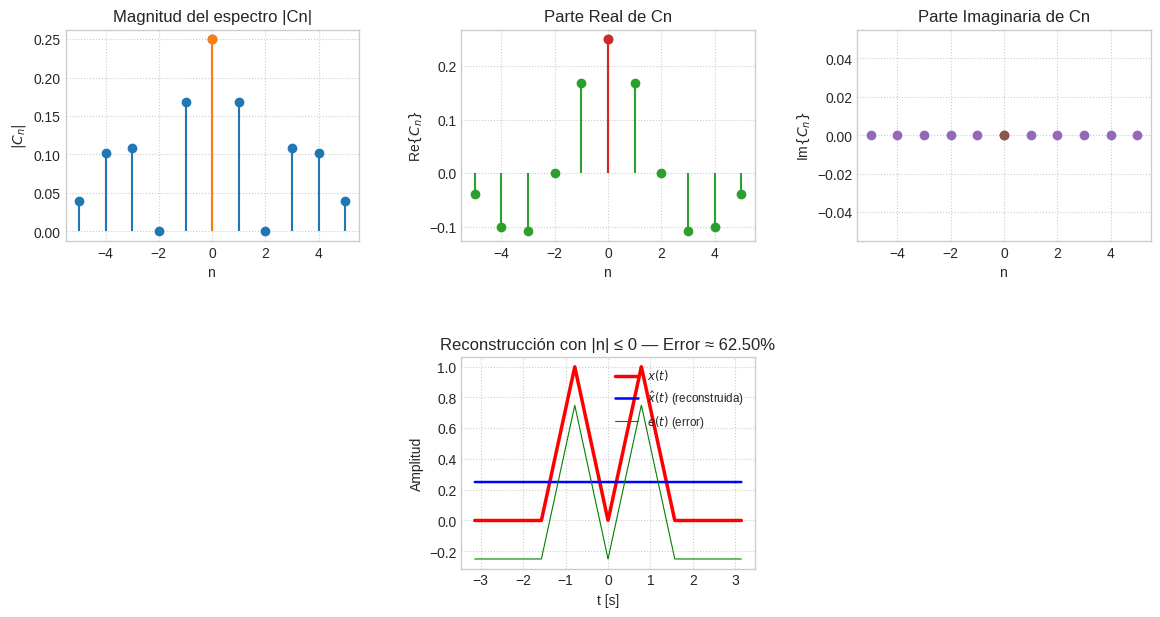

In [120]:

# ANIMACIÓN DE LA RECONSTRUCCIÓN DE UNA SEÑAL TRIANGULAR DOBLE
#   Este script calcula los coeficientes de Fourier Cn de una señal tipo
#   (dos triángulos opuestos), y muestra su reconstrucción progresiva usando
#   armónicos desde n = -5 hasta n = 5.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
# 1️ PARÁMETROS DE LA SEÑAL
A = 1.0             # Amplitud máxima de la señal
T = 2 * np.pi       # Periodo fundamental
w0 = 2 * np.pi / T  # Frecuencia angular fundamental
d1 = T / 8          # Punto intermedio (inicio del triángulo interior)
d2 = T / 4          # Extremo del triángulo
N_time = 2000       # Número de muestras en el tiempo

# Vector temporal (un periodo completo)
t = np.linspace(-T/2, T/2, N_time)

# 2️ DEFINICIÓN DE LA SEÑAL (DOS TRIÁNGULOS)
def x_of_t(t):
    """
    Señal tipo M:
        - Triángulo positivo a la derecha
        - Triángulo negativo a la izquierda
        - Ceros fuera de [-d2, d2]
    """
    x = np.zeros_like(t)
    for i, ti in enumerate(t):
        # Lado izquierdo ascendente
        if -d2 <= ti < -d1:
            x[i] = A * (ti + d2) / (d2 - d1)
        # Lado izquierdo descendente
        elif -d1 <= ti < 0:
            x[i] = A * (-(ti + d1) / d1 + 1)
        # Lado derecho ascendente
        elif 0 <= ti < d1:
            x[i] = A * ti / d1
        # Lado derecho descendente
        elif d1 <= ti < d2:
            x[i] = A * (d2 - ti) / (d2 - d1)
        else:
            x[i] = 0
    return x

# Generación de la señal
x = x_of_t(t)

# 3  CÁLCULO DE LOS COEFICIENTES DE FOURIER Cn
N_harm = 5  # Número máximo de armónicos a considerar
n_vals = np.arange(-N_harm, N_harm + 1)  # Índices n = -5 ... 5

def Cn_formula(n):
    """
    Fórmula analítica de los coeficientes de Fourier Cn
    obtenidos a partir de la segunda derivada de x(t).

    Cn = [2A / (T*(n*w0)^2 * d1*(d2-d1))] * [d2*cos(n*w0*d1) - d1*cos(n*w0*d2) - (d2 - d1)]
    """
    if n == 0:
        # Componente DC (promedio de la señal)
        return A * d2 / T
    alpha = n * w0
    num = 2 * A * (d2 * np.cos(alpha * d1) - d1 * np.cos(alpha * d2) - (d2 - d1))
    den = T * (alpha ** 2) * d1 * (d2 - d1)
    return num / den

# Vector de coeficientes complejos Cn
Cn = np.array([Cn_formula(n) for n in n_vals], dtype=complex)

# Matriz de las funciones base e^(j n w0 t)
phin = np.exp(1j * np.outer(t, n_vals * w0))

# Energía teórica (solo para cálculo del error relativo)
Px = (2 * (A ** 2) * d2) / (3 * T)


# 4️ CONFIGURACIÓN DE FIGURA Y ANIMACIÓN
fig, ax = plt.subplots(2, 3, figsize=(14, 7))
plt.subplots_adjust(wspace=0.35, hspace=0.55)

def update(k):
    """
    Función que actualiza las gráficas dinámicamente.
    Se ejecuta para cada valor de |n| ≤ k.
    """
    # Limpiar todos los subgráficos
    for a in ax.ravel():
        a.clear()

    # Índices de los armónicos actualmente considerados
    ind = np.abs(n_vals) <= k

    # (1) MAGNITUD DEL ESPECTRO |Cn|

    ax[0, 0].stem(n_vals, np.abs(Cn), linefmt='C0-', markerfmt='C0o', basefmt=" ")
    ax[0, 0].stem(n_vals[ind], np.abs(Cn[ind]), linefmt='C1-', markerfmt='C1o', basefmt=" ")
    ax[0, 0].set_title('Magnitud del espectro |Cn|')
    ax[0, 0].set_xlabel('n')
    ax[0, 0].set_ylabel(r'$|C_n|$')
    ax[0, 0].grid(True, ls=':')
    ax[0, 0].set_xlim(-N_harm - 0.5, N_harm + 0.5)


    # (2) PARTE REAL DE Cn

    ax[0, 1].stem(n_vals, np.real(Cn), linefmt='C2-', markerfmt='C2o', basefmt=" ")
    ax[0, 1].stem(n_vals[ind], np.real(Cn[ind]), linefmt='C3-', markerfmt='C3o', basefmt=" ")
    ax[0, 1].set_title('Parte Real de Cn')
    ax[0, 1].set_xlabel('n')
    ax[0, 1].set_ylabel(r'Re$\{C_n\}$')
    ax[0, 1].grid(True, ls=':')
    ax[0, 1].set_xlim(-N_harm - 0.5, N_harm + 0.5)


    # (3) PARTE IMAGINARIA DE Cn

    ax[0, 2].stem(n_vals, np.imag(Cn), linefmt='C4-', markerfmt='C4o', basefmt=" ")
    ax[0, 2].stem(n_vals[ind], np.imag(Cn[ind]), linefmt='C5-', markerfmt='C5o', basefmt=" ")
    ax[0, 2].set_title('Parte Imaginaria de Cn')
    ax[0, 2].set_xlabel('n')
    ax[0, 2].set_ylabel(r'Im$\{C_n\}$')
    ax[0, 2].grid(True, ls=':')
    ax[0, 2].set_xlim(-N_harm - 0.5, N_harm + 0.5)


    # (4) RECONSTRUCCIÓN DE LA SEÑAL

    # Suma parcial de armónicos: x̂(t) = Σ Cn * e^(j n w0 t)
    xe = np.real(np.sum(phin[:, ind] * Cn[ind][None, :], axis=1))

    # Error instantáneo
    et = x - xe

    # Cálculo del error relativo en energía
    energy_sel = np.sum(np.abs(Cn[ind])**2)
    er = 1 - energy_sel / Px if Px != 0 else 0

    # Gráfica de la reconstrucción
    ax[1, 1].plot(t, x, 'r', lw=2.5, label=r'$x(t)$')
    ax[1, 1].plot(t, xe, 'b', lw=1.8, label=r'$\hat{x}(t)$ (reconstruida)')
    ax[1, 1].plot(t, et, 'g', lw=0.8, label=r'$e(t)$ (error)')
    ax[1, 1].legend(fontsize='small', loc='upper right')
    ax[1, 1].grid(True, ls=':')
    ax[1, 1].set_xlabel('t [s]')
    ax[1, 1].set_ylabel('Amplitud')
    ax[1, 1].set_title(f'Reconstrucción con |n| ≤ {k} — Error ≈ {er*100:.2f}%')

    # Paneles vacíos (decorativos)
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')


# 5️ CREACIÓN DE LA ANIMACIÓN INTERACTIVA

frames = np.arange(0, N_harm + 1)  # Armónicos de 0 a ±5
anim = animation.FuncAnimation(fig, update, frames=frames, interval=400, blit=False)

# Configuración para visualización en Jupyter/Colab
rc('animation', html='jshtml')
HTML(anim.to_jshtml())